# **LiftIQ: Daily Calorie and Macronutrient Tracker using Python and Google Sheets**

Track, analyze, and visualize daily nutrition data from Google Sheets using Python (pandas, seaborn, and matplotlib). This notebook helps monitor calorie trends and macronutrient distribution for informed nutrition decisions.

### 🔄 Data Updates

This notebook is currently updated **manually** by refreshing the linked Google Sheet. All visualizations and statistics reflect the most recent available data at the time of the last update.

**Planned automation:**  
Future versions will include automatic data syncing using Google Forms, Python scripts, or APIs to streamline the process and ensure truly real-time nutrition tracking.




## 📦 Install and Import Required Libraries

This section installs and imports the required Python libraries for working with Google Sheets, data analysis, and visualization. It also handles authentication for accessing your Google Sheets data. Google Sheets is used as the data source for daily calories and macros.

**Libraries used:**
- `gspread` and `gspread_dataframe`: to read Google Sheets
- `pandas`: for data manipulation
- `seaborn` and `matplotlib`: for visualization
- `google.colab.auth`: to authenticate in Google Colab


In [21]:
!pip install --upgrade -q gspread gspread_dataframe google-auth

import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe
from google.colab import auth
from google.auth import default # Import the default function from google.auth
import matplotlib.pyplot as plt
import seaborn as sns

# Authenticate
auth.authenticate_user()
# Use google.auth.default() to get the credentials
creds, _ = default()
gc = gspread.authorize(creds)

## 🔗 Load Nutrition Data from Google Sheets

This section connects to the specified Google Sheet using its unique ID and reads the data from the `"Kcal"` worksheet. The data is then loaded into a pandas DataFrame for further analysis and visualization.

- `sheet_id`: The unique identifier of the Google Sheet.
- `sheet_name`: The specific tab or worksheet containing the nutrition data.
- `get_as_dataframe()`: Converts the worksheet content into a pandas DataFrame.

📌 **Note:** Make sure the worksheet name matches exactly (e.g., `"Kcal"`), or update it accordingly.


In [22]:
# Open the Google Sheet
sheet_id = "1WasZpz2HazySQA6S0owWgesaFsxqN_8OfxJHiBk59QQ"
sheet_name = "Kcal"  # Change this to your actual sheet name if different
worksheet = gc.open_by_key(sheet_id).worksheet(sheet_name)

# Load data as a DataFrame
df = get_as_dataframe(worksheet)

# Preview the first few rows
df.head()


,Date,Kcal,Protein,Carbs,Fat,Maintenance,Rec Prot,Deficit,Weekly Deficit
0,05/02/2025,2570.0,228.80,273.48,60.700,2750.0,187.0,=F2-B2,NaN
1,05/03/2025,2635.0,205.00,274.28,78.180,2750.0,187.0,=F3-B3,NaN
2,05/04/2025,2648.0,224.00,273.88,71.800,2750.0,187.0,=F4-B4,NaN
3,05/05/2025,2537.5,264.75,211.66,71.175,2750.0,187.0,=F5-B5,NaN
4,05/06/2025,2511.0,282.88,247.50,36.435,2750.0,187.0,=F6-B6,NaN


## 🧹 Data Cleaning and Type Conversion

This section cleans the loaded data and ensures correct data types for analysis:

- **Remove empty rows:** Drops any rows where all values are missing (`NaN`).
- **Convert columns to proper types:**
  - `Date` column to datetime format for time series analysis.
  - Numeric columns (`Kcal`, `Protein`, `Carbs`, `Fat`, `Maintenance`, `Rec Prot`, `Deficit`) to numeric types, coercing errors to handle any invalid data gracefully.

This ensures the dataset is clean and ready for accurate calculations and visualization.


In [11]:
# Drop empty rows
df.dropna(how='all', inplace=True)

# Convert date and numerical columns
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Kcal'] = pd.to_numeric(df['Kcal'], errors='coerce')
df['Protein'] = pd.to_numeric(df['Protein'], errors='coerce')
df['Carbs'] = pd.to_numeric(df['Carbs'], errors='coerce')
df['Fat'] = pd.to_numeric(df['Fat'], errors='coerce')
df['Maintenance'] = pd.to_numeric(df['Maintenance'], errors='coerce')
df['Rec Prot'] = pd.to_numeric(df['Rec Prot'], errors='coerce')
df['Deficit'] = pd.to_numeric(df['Deficit'], errors='coerce')


## 📈 Daily Calories Visualization with 7-Day Moving Average

This section creates a time series plot of daily calorie intake with the following features:

- **Daily calories (`Kcal`)** plotted as points connected by lines.
- **7-day moving average** to smooth daily fluctuations and highlight trends.
- A **horizontal dashed red line** at 1750 kcal representing the maintenance calorie level.
- Axis labels, rotated date ticks for readability, legend, and grid for clarity.

This visualization helps track calorie intake over time and compare it against maintenance needs.


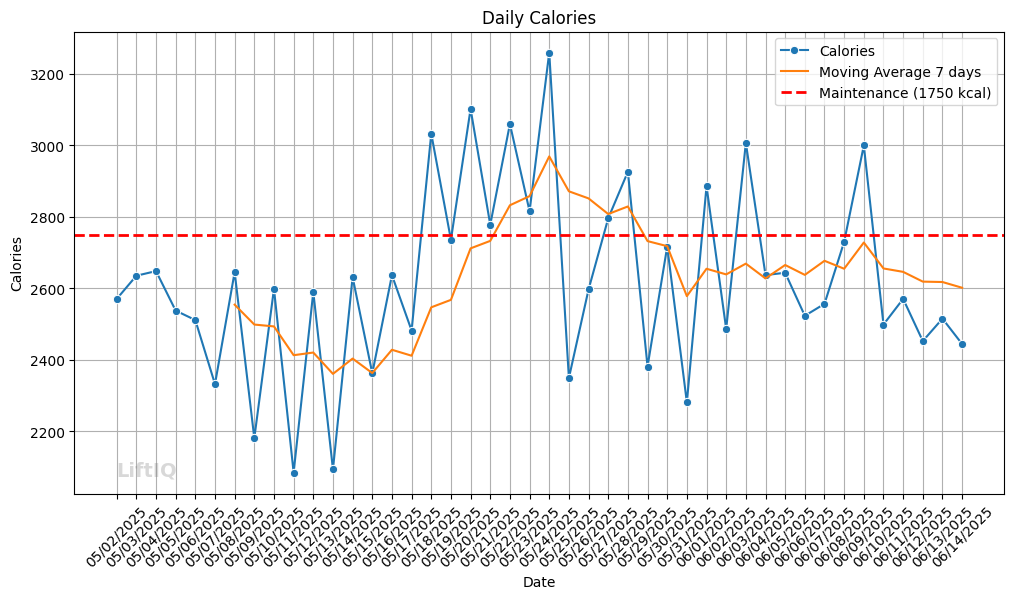

In [27]:
plt.figure(figsize=(12,6))
df['Calories_Mean_7d'] = df['Kcal'].rolling(window=7).mean() # Moving Average
sns.lineplot(data=df, x='Date', y='Kcal', marker='o', label='Calories')
sns.lineplot(data=df, x='Date', y='Calories_Mean_7d', label='Moving Average 7 days')
plt.axhline(y=2750, color='red', linestyle='--', linewidth=2, label='Maintenance (1750 kcal)')



# Add LiftIQ as watermark in bottom right corner
plt.text(x=df['Date'].min(), y=plt.ylim()[0] + 50,  # Slightly above bottom left corner
         s='LiftIQ', fontsize=14, color='gray', alpha=0.3, fontweight='bold')

plt.title('Daily Calories')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



## ⚖️ Daily Macronutrient Intake with Reference Targets

This plot shows daily intake of the three essential macronutrients:

- **Protein**
- **Carbohydrates**
- **Fat**

To provide meaningful context, it also includes horizontal dashed lines representing reference intake levels:

- 🟣 **Protein:** 187g/day
- 🟢 **Carbohydrates:** 320g/day
- 🟡 **Fat:** 60g/day

These references help evaluate how well your daily nutrition aligns with your dietary goals, making it easier to spot surpluses or deficiencies in any macronutrient category.

The graph includes:
- Labeled lines and legend
- Rotated dates for readability
- Gridlines and tight layout for a clean look


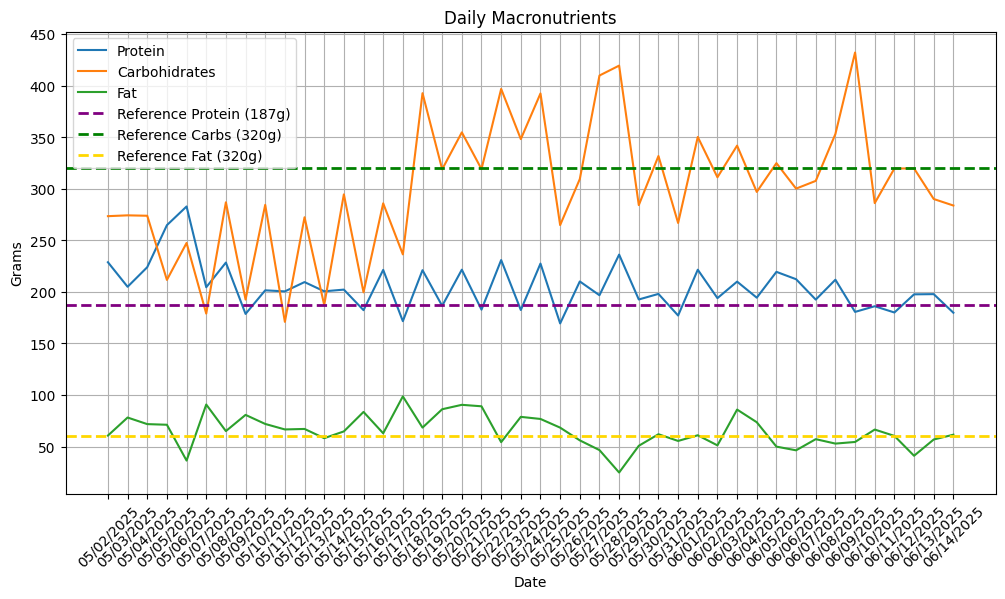

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Protein', label='Protein')
sns.lineplot(data=df, x='Date', y='Carbs', label='Carbohidrates')
sns.lineplot(data=df, x='Date', y='Fat', label='Fat')

# Add horizontal line for reference protein intake
plt.axhline(y=187, color='purple', linestyle='--', linewidth=2, label='Reference Protein (187g)')

# Add horizontal line for reference carbs intake
plt.axhline(y=320, color='green', linestyle='--', linewidth=2, label='Reference Carbs (320g)')

# Add horizontal line for reference fat intake
plt.axhline(y=60, color='gold', linestyle='--', linewidth=2, label='Reference Fat (320g)')

plt.title('Daily Macronutrients')
plt.ylabel('Grams')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
